In [132]:
import yfinance as yf

# отримуємо дані з  Yahoo Finance
stock_name = 'TSLA'
data = yf.download(stock_name, start="2020-03-26", end="2021-03-29")

[*********************100%***********************]  1 of 1 completed


In [133]:
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM

def lstm(stock_name, data):
    # обираємо ціну Close акції
    data = data.filter(['Close'])
    # конвертуємо дані у масив
    dataset = data.values
    # кількість даних для тренування моделі - 80%, тест - 20%
    training_data_len = int(np.ceil( len(dataset) * .80 ))
    
    # масштабування даних відносно відрізку від 0 до 1
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    
    # створюємо масштабований масив даних
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        if i<= 61:
            print(x_train)
            print(y_train)
            print()

    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Будуємо LSTM модель
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.35))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(1))
    # Компіляція
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Тренування
    model.fit(x_train, y_train, batch_size=1, epochs=21)
    
    # Малюємо структуру моделі
    keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

    # Створюємо сет даних для тестування моделі
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Передбачення на основі тестових даних
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Знаходимо похибку
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print(rmse)
    
    # Малюємо графік
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,6))
    plt.title('Model LSTM')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    
    # Робимо передбачення на наступний місяць
    data_new = yf.download(stock_name, start="2021-03-01", end="2021-04-30")

    data_new = data_new.filter(['Close'])
    dataset = data_new.values
    training_data_len = len(dataset)

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    test_data = scaled_data[training_data_len - len(data_new): , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(20, len(test_data)):
        x_test.append(test_data[i-20:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    hist_data_new = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
    hist_data_new = hist_data_new.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    hist_data_new = hist_data_new['Close']
    hist_data_new = np.array(hist_data_new)
    pred_lstm = model.predict(x_test)
    pred_lstm = scaler.inverse_transform(pred_lstm)
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.ylabel(f'Prices {stock_name}')
    plt.plot(pred_lstm, label = 'predicted')
    plt.plot(hist_data_new, label = 'historical')
    plt.title(f'{stock_name} predicted price')
    plt.legend()
    plt.show()
    
    return pred_lstm

[array([0.02140379, 0.01860399, 0.01512   , 0.01203238, 0.01755374,
       0.00683922, 0.        , 0.0064479 , 0.01559463, 0.02296906,
       0.02382491, 0.02992441, 0.04960389, 0.06448404, 0.06951815,
       0.07340104, 0.0755924 , 0.07369136, 0.05863447, 0.07009376,
       0.06340856, 0.06833662, 0.08691788, 0.07943742, 0.08736223,
       0.08265885, 0.06232045, 0.07743539, 0.07920767, 0.08283557,
       0.0821943 , 0.09213629, 0.09008376, 0.08960914, 0.0849512 ,
       0.08807416, 0.08702392, 0.09067453, 0.0892557 , 0.09116178,
       0.09420144, 0.09149504, 0.09199744, 0.09234079, 0.08870027,
       0.09606966, 0.11200005, 0.10782432, 0.10817777, 0.10348702,
       0.10885943, 0.12508267, 0.1227474 , 0.1440502 , 0.13086912,
       0.12138663, 0.1354286 , 0.1332145 , 0.1356533 , 0.13872578])]
[0.13795322292877032]

[array([0.02140379, 0.01860399, 0.01512   , 0.01203238, 0.01755374,
       0.00683922, 0.        , 0.0064479 , 0.01559463, 0.02296906,
       0.02382491, 0.02992441, 0.04

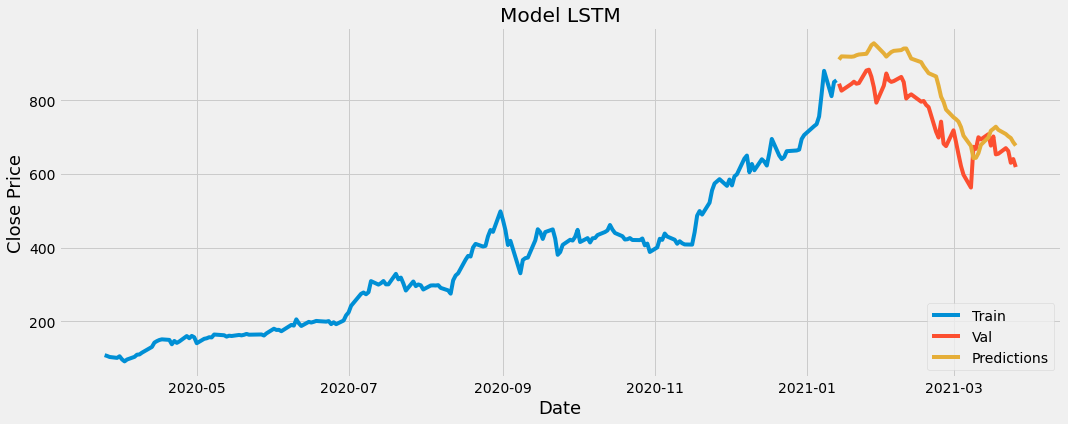

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


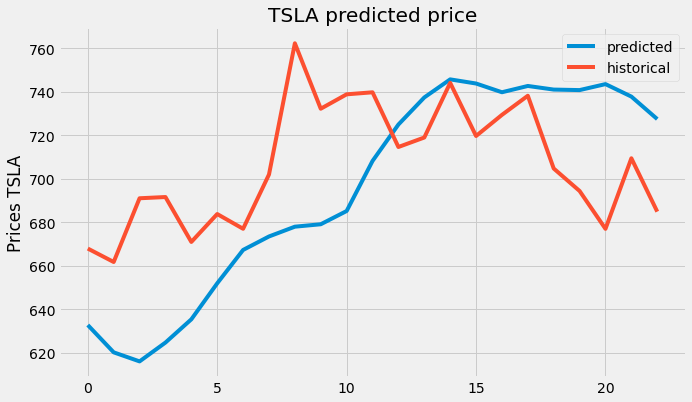

In [134]:
lstm_pred = lstm(stock_name, data)

In [135]:
print(lstm_pred.shape)

(23, 1)


In [136]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import random

def arima(stock_name, data):
    df_close = data['Close']
    # Test for staionarity
    def test_stationarity(timeseries):
        # Determing rolling statistics
        rolmean = timeseries.rolling(12).mean()
        rolstd = timeseries.rolling(12).std()

        # print("Results of dickey fuller test")
        adft = adfuller(timeseries, autolag='AIC')
        # output for dft will give us without defining what the values are.
        # hence we manually write what values does it explains using a for loop
        output = pd.Series(adft[0:4],
                           index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
        for key, values in adft[4].items():
            output['critical value (%s)' % key] = values
        # print(output)

    test_stationarity(df_close)

    # split data into train and training set
    df_log = df_close
    #train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
    train_data, test_data = df_log[3:int(len(df_log) * 1.0)], df_log[int(len(df_log) * 1.0):]
    test_values = len(df_log) * 0.01 + 1.0

    # print(model_autoARIMA.summary())
    model = ARIMA(train_data, order=(3, 1, 2))
    # model = ARIMA(train_data, order=(2, 1, 2))
    arima_model = model.fit(disp=-1)
    print(arima_model.summary())
    
    print('################forecast next################')
    preds, se, conf = arima_model.forecast(23, alpha=0.05)
    preds = np.vstack(preds)
    hist_data = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
    hist_data = hist_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    hist_data = hist_data['Close']
    hist_data = np.array(hist_data)
    plt.plot(hist_data, label='historical')
    plt.plot(preds, label='predictions')
    plt.title(f'{stock_name} prediction for 30 days')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    return preds

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1119.957
Method:                       css-mle   S.D. of innovations             21.151
Date:                Wed, 12 May 2021   AIC                           2253.914
Time:                        18:52:35   BIC                           2278.564
Sample:                             1   HQIC                          2263.835
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0754      1.286      1.613      0.107      -0.446       4.597
ar.L1.D.Close     0.1376      0.066      2.095      0.036       0.009       0.266
ar.L2.D.Close    -0.9478      0.024    -

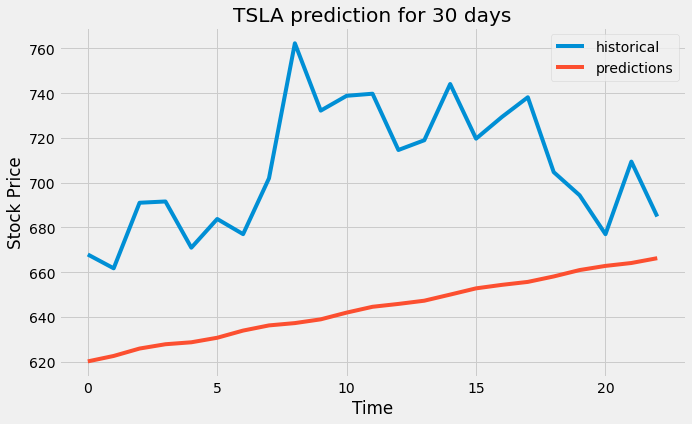

(23, 1)


In [137]:
arima_pred = arima(stock_name, data)
print(arima_pred.shape)

In [138]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import math
import pandas as pd
import yfinance as yf
import statistics as stat
from scipy.special import ndtri
from scipy.stats import norm
import random
from sklearn.metrics import mean_squared_error

mu, sig, N = 1.1, 1, 100000
pts = []


def q(x):
    return (1 / (math.sqrt(2 * math.pi * sig ** 2))) * (math.e ** (-((x - mu) ** 2) / (2 * sig ** 2)))

def MCMC(n):
    r = np.zeros(1)
    p = q(r[0])
    pts = []

    for i in range(N):
        rn = r + np.random.uniform(-1, 1)
        pn = q(rn[0])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn / p:
                p = pn
                r = rn
        pts.append(r)

    pts = random.sample(pts, len(pts))
    pts = np.array(pts)
    
    return pts

def MH(stock_name, data):
    hist_data = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
    hist_data = hist_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    hist_data = hist_data['Close']
    hist_data = np.array(hist_data)
    stock_pred = []
    data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    dt1 = data['Close']
    maturnity = 1
    volatility = 0.25
    risk_free = 0.1
    timestep = 1
    steps = 23
    delta_t = maturnity / steps
    i = 0
    stock_pred.append(dt1[-1])
    while timestep < steps:
        stock_price = stock_pred[-i]
        time_exp = maturnity - delta_t * timestep
        pts = MCMC(N)
        stock_price = stock_price * math.exp(((risk_free - 0.5 * (
            math.pow(volatility, 2))) * delta_t + volatility * math.sqrt(delta_t) * pts[timestep + 5]))
        stock_pred.append(stock_price)
        i = i + 1
        timestep = timestep + 1
    
    rmse = math.sqrt(mean_squared_error(hist_data, stock_pred))
    print(rmse)
    
    plt.plot(stock_pred, label='predictions')
    plt.plot(hist_data, label = 'historical')
    plt.title(f'{stock_name} prediction for 30 days')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    return stock_pred

[*********************100%***********************]  1 of 1 completed
45.34961458415


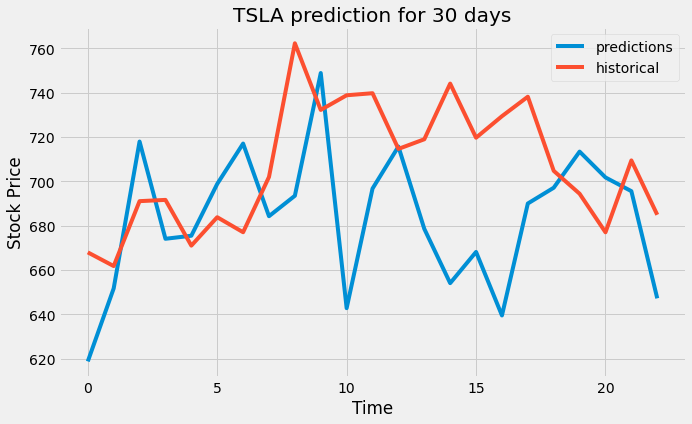

In [139]:
mcmc_pred = MH(stock_name, data)
mcmc_pred = np.vstack(mcmc_pred)

In [140]:
print(mcmc_pred.shape)

(23, 1)


[*********************100%***********************]  1 of 1 completed
model solve
Model status:  Optimal
Optimal_weights:
MINIMIZE
-643.7823653271889*weight_arima + -695.5372765582541*weight_lstm + -683.5072500297902*weight_mcmc + 706.7308694590693
SUBJECT TO
_C1: weight_arima + weight_lstm + weight_mcmc <= 1

_C2: weight_arima + weight_lstm + weight_mcmc >= 1

VARIABLES
0.02 <= weight_arima <= 0.6 Continuous
0.02 <= weight_lstm <= 0.6 Continuous
0.02 <= weight_mcmc <= 0.6 Continuous

[[627.16604909]
 [632.20402135]
 [654.96952223]
 [643.52105049]
 [650.47500717]
 [669.3311315 ]
 [685.52977956]
 [676.82995001]
 [683.06231915]
 [704.81797308]
 [668.19678748]
 [702.56987444]
 [719.85635707]
 [713.24241713]
 [708.96455658]
 [713.2390876 ]
 [699.95916126]
 [720.92821749]
 [722.68292493]
 [728.79697825]
 [726.05324528]
 [720.27990089]
 [695.73170569]]


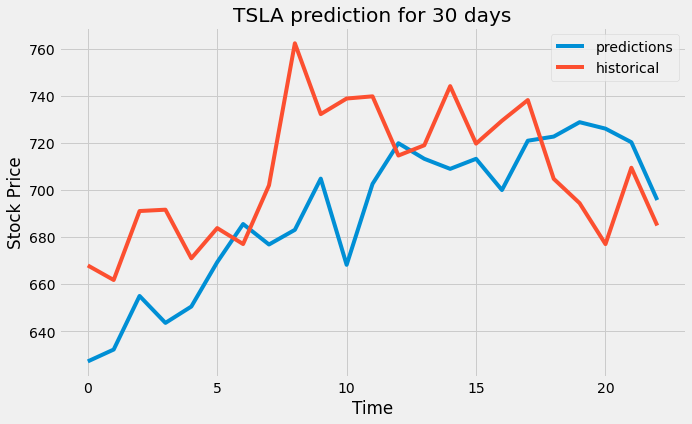

RMSE = 5.356847025917713
MCMC weight: 0.38
ARIMA weight: 0.02
LSTM weight: 0.6


In [141]:
import pulp as plp

hist_data = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
hist_data = hist_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
hist_data = hist_data['Close']
hist_data = np.array(hist_data)

preds = []
mse = []
weight_mcmc = 0.3
weight_arima = 0.4
weights_lstm = 0.4

# weights solver
model = plp.LpProblem('Optimal_weights', plp.LpMinimize)
# weights--->variables
weight_mcmc = plp.LpVariable("weight_mcmc", lowBound=0.02, upBound=0.6)
weight_arima = plp.LpVariable("weight_arima", lowBound=0.02, upBound=0.6)
weight_lstm = plp.LpVariable("weight_lstm", lowBound=0.02, upBound=0.6)

for i in range(len(hist_data)):
    preds.append(mcmc_pred[i]*weight_mcmc + arima_pred[i]*weight_arima + lstm_pred[i]*weight_lstm)
    
for i in range (len(hist_data)):
    mse.append(hist_data[i] - preds[i])
# target function--->mean squared error
mse = np.mean(mse)
sum_w = weight_mcmc + weight_arima + weight_lstm

model += mse
model += sum_w <= 1.0
model += sum_w >= 1.0

plp.LpSolverDefault.msg = 1

# solve #
model.solve()
print('model solve')
status = model.solve()
print("Model status: ", plp.LpStatus[status])
print(model)

weight_mcmc_f = weight_mcmc.varValue
weight_arima_f = weight_arima.varValue
weight_lstm_f = weight_lstm.varValue

preds_final = []
# create final predictions from 3 methods
for i in range(len(hist_data)):
    preds_final.append(mcmc_pred[i]*weight_mcmc_f + arima_pred[i]*weight_arima_f + lstm_pred[i]*weight_lstm_f)
preds_final = np.vstack(preds_final)    
print(preds_final)
plt.plot(preds_final, label='predictions')
plt.plot(hist_data, label = 'historical')
plt.title(f'{stock_name} prediction for 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

mse = []
for i in range (len(hist_data)):
    mse.append(abs(hist_data[i] - preds_final[i]))
mse = np.mean(mse)
rmse = math.sqrt(mse)
print(f'RMSE = {rmse}')
print(f'MCMC weight: {weight_mcmc_f}')
print(f'ARIMA weight: {weight_arima_f}')
print(f'LSTM weight: {weight_lstm_f}')